## Case Study: Traffic Prediction

Predicting traffic is another use case of anomaly detection (i.e., consumer traffic, network traffic) . Usually traffic is normal but there are instances where traffic can spike or drop unexpectedly. In this case study, we will look at a dataset that studies traffic for taxis in New York City (NYC). The time period spans from June 30th 2014 to Jan 31st 2015 (i.e., 6 months). During this time there were 5 events where the amount of traffic changed significantly(NYC marathon, Christmas, New Years Day, Snowstorm, and Thanksgiving).

In [ ]:
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change PATH to working directory on Google Drive
PATH = "/content/drive/MyDrive/AnomalyDetectionProjects/"
# PATH = ""

In [ ]:
# Read in dataset
taxi_df = pd.read_csv(PATH + "taxi.csv", index_col=0)

In [ ]:
taxi_df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
# Check for any null values
taxi_df.isnull().sum().max()

0

In [ ]:
# Convert to timestamp
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df = taxi_df.set_index('timestamp')

In [ ]:
# Change to hourly only (take out eveyr 30 mins)
taxi_df = taxi_df.resample('H').sum()
taxi_df

,value
timestamp,
2014-07-01 00:00:00,18971
2014-07-01 01:00:00,10866
2014-07-01 02:00:00,6693
2014-07-01 03:00:00,4433
2014-07-01 04:00:00,4379
...,...
2015-01-31 19:00:00,56577
2015-01-31 20:00:00,48276
2015-01-31 21:00:00,48389


In [ ]:
taxi_df['day'] = [i.day for i in taxi_df.index]
taxi_df['day_name'] = [i.day_name() for i in taxi_df.index]
taxi_df['day_of_year'] = [i.dayofyear for i in taxi_df.index]
taxi_df['week_of_year'] = [i.weekofyear for i in taxi_df.index]
taxi_df['hour'] = [i.hour for i in taxi_df.index]
taxi_df['is_weekday'] = [i.isoweekday() for i in taxi_df.index]

In [ ]:
taxi_df

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday
timestamp,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6


There are 5 five events show to have abnormal activities with traffic:
* NYC Marathon: Nov 2nd
* Thanksgiving: Nov 27th
* Christmas: Dec 25th
* New Years: Dec 31st
* Snowstorm: Jan 26th

Text(0, 0.5, 'Taxi Rides')

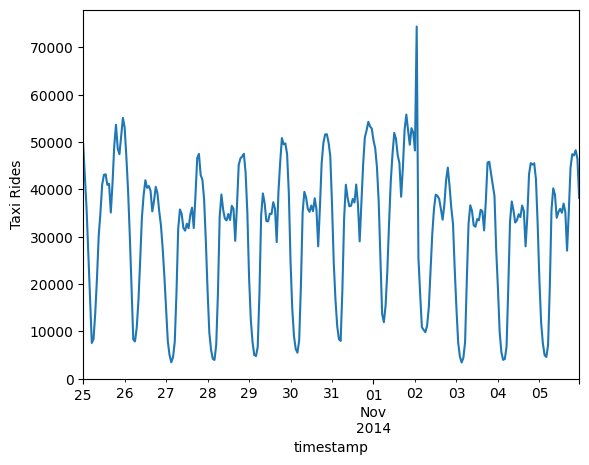

In [ ]:
# Marathon
taxi_df.loc[ "2014-10-25" :  "2014-11-05"].value.plot()
plt.ylabel("Taxi Rides")

Text(0, 0.5, 'Taxi Rides')

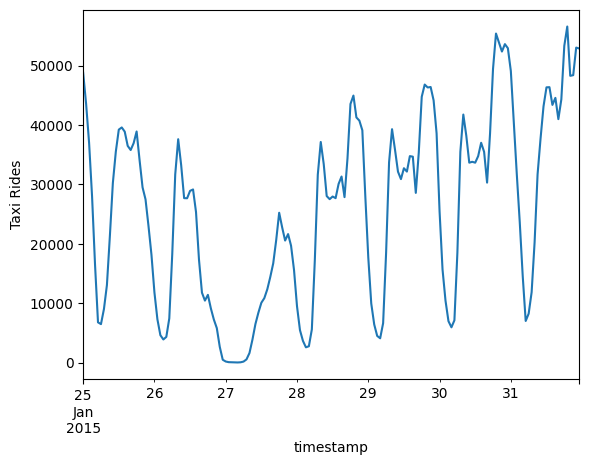

In [ ]:
# Snowstorm
taxi_df.loc[ "2015-01-25" :  "2015-02-05"].value.plot()
plt.ylabel("Taxi Rides")

Text(0, 0.5, 'Taxi Rides')

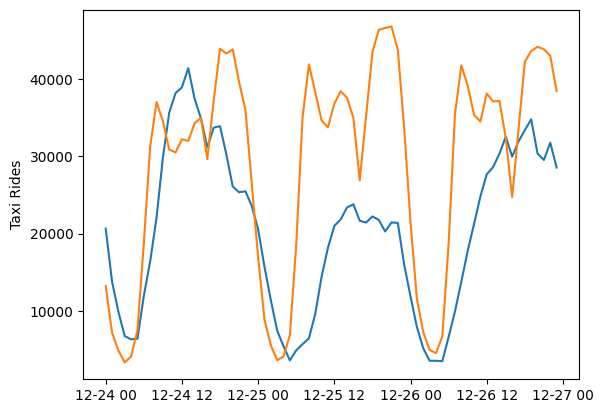

In [ ]:
fig1 = taxi_df.loc[ "2014-12-24" :  "2014-12-26"]
fig2 = taxi_df.loc[ "2014-12-01" :  "2014-12-03"]
plt.plot(fig1.index, fig1.value)
plt.plot(fig1.index, fig2.value)
plt.ylabel("Taxi Rides")

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(taxi_df, x=taxi_df.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')



# # obtain y value of anomalies to plot**
# y_values = [taxi_df.loc[i]['value'] for i in taxi_df]

# fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
#                 name = 'Anomaly',
#                 marker=dict(color='red',size=10)))

fig.show()

**Isolation Forests for Time Series**



*   Unsupervised algorithm
*   Tree based algorithm
* Assumes anomalies are seperable and would be found first compared to other "normal" points (i.e., shorter depth trees)
* Cannot capture some dependecies that are captured with a RNN  



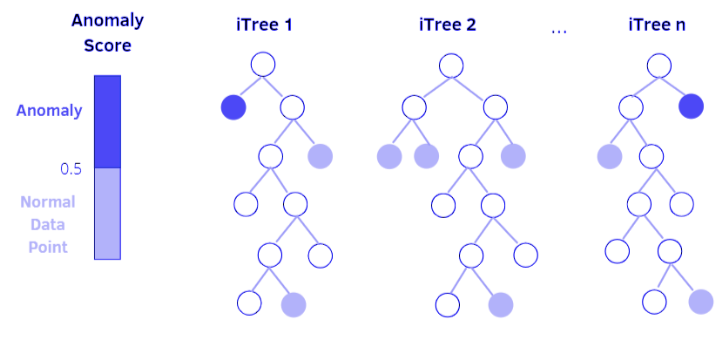

In [ ]:
from pycaret.anomaly import *

In [ ]:
# Create session
s = setup(taxi_df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(5160, 7)"
2,Transformed data shape,"(5160, 13)"
3,Numeric features,6
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
# train model
iforest = create_model('iforest', fraction = 0.02)
iforest_results = assign_model(iforest)
iforest_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,-0.038309
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,-0.032644
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,-0.038784
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,-0.033416
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,-0.031312
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,1,0.010211
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,1,0.000615
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,1,0.000615


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(iforest_results, x=iforest_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [iforest_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()

**Local Outlier Factor**



*   Unsupervised algorithm that focuses on finding isolated points
*   Similar steps to KNN
*   Computes the local density (i.e., how isolated the point is to its neighbours) and the density of its neighbours (i.e., how isolated its neighbours are)


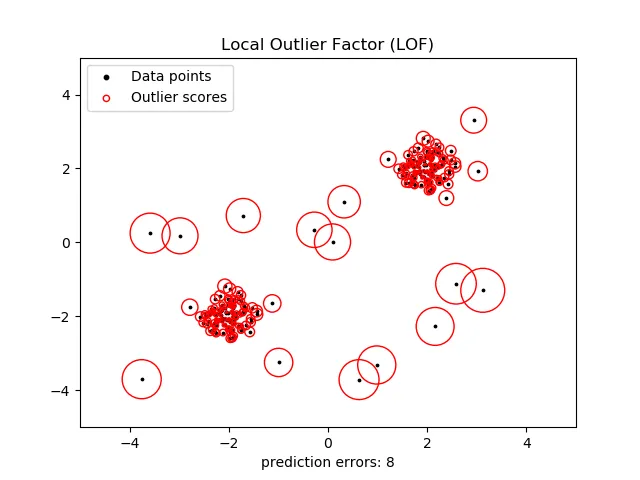

In [ ]:
# train model
lof = create_model('lof', fraction = 0.02)
lof_results = assign_model(lof)
lof_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,1.070078
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,0.984749
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,1.011035
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,1.033525
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,1.039746
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,1,1.772234
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,1,1.700139
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,0,1.487921


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(lof_results, x=lof_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = lof_results[lof_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [lof_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()

**Minimum Covariance Determinant**



*   Unsupervised algorithm
*   Statistical multivariate method that aims to find a center(mean) and spread(covariance) of the data. Points outside the spread will be labeled as outliers.
* Finds subset of points that contribute most to the estimation
* Mahalanobis distance used for distance calculations

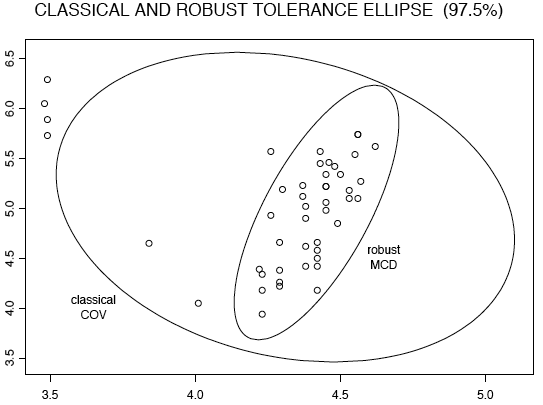

In [ ]:
# train model
mcd = create_model('mcd', fraction = 0.02)
mcd_results = assign_model(mcd)
mcd_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,value,day,day_name,day_of_year,week_of_year,hour,is_weekday,Anomaly,Anomaly_Score
timestamp,,,,,,,,,
2014-07-01 00:00:00,18971,1,Tuesday,182,27,0,2,0,14.283954
2014-07-01 01:00:00,10866,1,Tuesday,182,27,1,2,0,13.198576
2014-07-01 02:00:00,6693,1,Tuesday,182,27,2,2,0,13.662125
2014-07-01 03:00:00,4433,1,Tuesday,182,27,3,2,0,14.386430
2014-07-01 04:00:00,4379,1,Tuesday,182,27,4,2,0,14.627846
...,...,...,...,...,...,...,...,...,...
2015-01-31 19:00:00,56577,31,Saturday,31,5,19,6,0,38.675196
2015-01-31 20:00:00,48276,31,Saturday,31,5,20,6,0,35.771476
2015-01-31 21:00:00,48389,31,Saturday,31,5,21,6,0,35.884390


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# plot value on y-axis and date on x-axis**
fig = px.line(mcd_results, x=mcd_results.index, y="value", title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')

# create list of outlier_dates**
outlier_dates = mcd_results[mcd_results['Anomaly'] == 1].index

# obtain y value of anomalies to plot**
y_values = [mcd_results.loc[i]['value'] for i in outlier_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()